# Region-level analysis

In [21]:
#hide_input
from mo_covid19.data import *

## Data extraction

In [4]:
#hide_input
locations_type = "region"
data = collect_data(type_=locations_type)

data.loc[data.locality_name == 'State of São Paulo', 'locality_name'] = "São Paulo"
data.loc[data.locality_name == 'State of Amazonas', 'locality_name'] = "Amazonas"
data.loc[data.locality_name == 'Lombardy', 'locality_name'] = "Lombardia"

long_regions = data.melt(id_vars=["locality_name", "date"], var_name="category", value_name="value")

In [5]:
#hide_input
regions = ["Île-de-France", "Amazonas", "São Paulo", "Lombardia", "New York"]

colors_sequence_category = [
    "#AB63FA",
    "#19D3F3",
    "#FF6692",
    "#68BEBA",
    "#FF7F0E",
    "#8C564B",
]
colors_sequence_locality = colors_sequence_category + ["#DAA51F"]

colors_map_locality = dict(zip(regions, colors_sequence_locality))

### Filtering, renaming, and aggregating

#### Inspecting regions

In [6]:
fig = px.line(long_regions, x="date", y="value", color="category", labels=plotly_labels, color_discrete_sequence = colors_sequence_category,
              facet_col="locality_name", facet_col_wrap=2, height=800)
fig.show()

## Data preparation

### Enriching with dates

In [7]:
#hide_input
data_lockdown = { 
    "first_case_date": {
        "Argentina": "2020-03-04",
        "Japan": "2020-01-15",
        "South Korea": "2020-01-20",
        "Canada": "2020-01-26",
        "Germany": "2020-01-28",
        "Spain": "2020-02-01",
        "Argentina": "2020-03-04",
        "New Zealand": "2020-02-28",

        "São Paulo": "2020-02-26", 
        "Amazonas": "2020-03-13",  
        "Île-de-France": "2020-01-23", 
        "Lombardia": "2020-02-14",  
        "New York": "2020-03-01",
    },
    "restriction_date": {
        "Argentina": "2020-03-16",
        "Japan": "2020-03-02",  
        "South Korea": "2020-02-22",
        "Canada": "2020-03-16",  
        "Germany":"2020-03-16",  
        "Spain":"2020-03-09",
        "Argentina":"2020-03-16",
        "New Zealand":"2020-03-24", 

        "São Paulo": "2020-03-16", 
        "Amazonas": "2020-03-16",  
        "Île-de-France": "2020-03-12",
        "Lombardia": "2020-02-23",  
        "New York": "2020-03-15",

    },
    "ease_restriction_date": {
        "Argentina": "2020-05-15",
        "Japan": "2020-05-15",  
        "South Korea": "2020-05-15",
        "Canada": "2020-05-15",  
        "Germany": "2020-05-15",  
        "Spain": "2020-05-15",
        "Argentina": "2020-05-15",
        "New Zealand": "2020-05-15",

        "São Paulo": "2020-06-01", 
        "Amazonas": "2020-05-31",  
        "Île-de-France": "2020-05-11", 
        "Lombardia": "2020-05-04",  
        "New York": "2020-05-15",
    }
}

data_period = add_days_columns(data, data_lockdown)
data_period.head()

date  locality_name     retail  grocery_pharmacy      parks  \
0 2020-02-15      Lombardia   3.076923         -3.538462  42.307692   
1 2020-02-15       New York   9.096774         -0.967742  16.892857   
2 2020-02-15       Amazonas  -2.857143          5.750000 -19.500000   
3 2020-02-15      São Paulo   2.424528          1.944724   2.500000   
4 2020-02-15  Île-de-France -11.555556        -10.444444   7.333333   

   transit_stations  workplaces  residential first_case_date restriction_date  \
0          9.615385   -1.076923    -0.846154      2020-02-14       2020-02-23   
1         10.625000    0.387097    -0.179487      2020-03-01       2020-03-15   
2         -5.333333    6.500000    -1.000000      2020-03-13       2020-03-16   
3          1.007576    6.419355    -0.676647      2020-02-26       2020-03-16   
4          3.222222   -8.222222    -1.222222      2020-01-23       2020-03-12   

  ease_restriction_date  n_days_since_first_case  n_days_since_restriction  \
0            2020-05-04                        1                        -8   
1            2020-05-15                      -15                       -29   
2            2020-05-31                      -27                       -30   
3            2020-06-01                      -11                       -30   
4            2020-05-11                       23                       -26   

   n_days_since_ease_restriction  
0                            -79  
1                            -90  
2                           -106  
3                           -107  
4                            -86

(-120.0, 220.0)

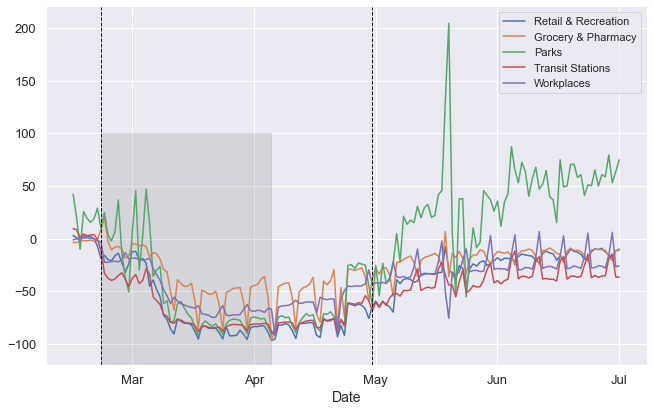

In [8]:
#hide_input
import matplotlib.dates as mdates

id_vars = ["date", "locality_name", "first_case_date", "restriction_date", "ease_restriction_date", "n_days_since_first_case", "n_days_since_restriction", "n_days_since_ease_restriction",]
data_to_plot = data_period.melt(
    id_vars,
    var_name="category", 
    value_name="value"
).query('locality_name=="Lombardia" and category!="residential" and date <= "2020-07-21"')

long_regions_plot = sns.relplot(
    x="date", 
    y="value", 
    hue="category", 
    data = data_to_plot, 
    col="locality_name", 
    col_wrap=2, 
    kind="line", 
    height=6, 
    legend="brief", 
    aspect=1.5, 
    markers=True, 
    dashes=True
)

        
long_regions_plot._legend.remove()

# Iterate thorugh each axis
for ax in long_regions_plot.axes:
    ax.set(xlabel='Date', ylabel='') 

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        set_labels = ['Retail & Recreation', 'Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces'] #labels[1:]
        ax.legend(handles=handles[1:], labels=set_labels, title="", fontsize=11, title_fontsize=11)


    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title("")

    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))

    # Make right ylabel more human-readable and larger 
    if ax.texts:
        # This contains the right ylabel text
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
              txt.get_text().split('=')[1],
              transform=ax.transAxes,
              va='center',
              fontsize='xx-large')
        # Remove the original text
        ax.texts[0].remove()

    ax.fill_between(data_to_plot.query("50 > n_days_since_restriction >= 0")["date"], -150, 100, color="gray", alpha=0.2)

from datetime import datetime

restriction_date = datetime.strptime('2020-02-23', '%Y-%m-%d') 
ease_restriction_date = datetime.strptime("2020-05-11", '%Y-%m-%d')

plt.axvline(restriction_date, color='k', linestyle='dashed', linewidth=1)
plt.axvline(ease_restriction_date, color='k', linestyle='dashed', linewidth=1)

plt.tick_params(axis='both',labelsize=13)
#plt.tick_params(axis='both',labelsize=13)

axes = plt.gca() 
axes.set_ylim([-120, 220])



In [9]:
#hide_input
long_regions_plot.savefig(f'{locations_type}_lombardy.png', format='png', dpi=600)

### Filtering using restriction dates (comment if you do not want to do this)

- mês de fevereiro: mês atipico para os paises. possibilidade de usar ou não usar o mês de fevereiro. verificar a influencia disso na analise dos dados. 
- paramos de usar restrição de data nas regiões (que escolhemos) por causa da lombardia, e da data de inicio da coleta dos dados.
- analisar se tiveram regiões que tomaram medidas de restrição antes do inicio da coleta dos dados.

In [ ]:
# data_period = data_by_days.query("n_days_since_restriction >= -7 & n_days_since_restriction <= 50")

#### Inspecting

In [10]:
#hide_input
fig = px.line(data_period.sort_values('n_days_since_restriction'), 
              x="n_days_since_restriction", y="workplaces", color="locality_name", 
              labels=plotly_labels, color_discrete_sequence = colors_sequence_locality)
fig.show()

### Centering the mean

- calibrar as regiões (como a google fala)

https://support.google.com/covid19-mobility/checklist/9834261?hl=pt-BR&ref_topic=9822927



In [11]:
#hide_input
data_period_small = data_period.query("date <= '2020-07-24'").copy() 
# data_period_small.head()

In [12]:
#hide_input
long_centered_mean = centering_mean(data_period_small)
long_centered_mean.head()

locality_name category  baseline_mean       date first_case_date  \
0      Amazonas   retail       0.703413 2020-02-15      2020-03-13   
1      Amazonas   retail       0.703413 2020-02-16      2020-03-13   
2      Amazonas   retail       0.703413 2020-02-17      2020-03-13   
3      Amazonas   retail       0.703413 2020-02-18      2020-03-13   
4      Amazonas   retail       0.703413 2020-02-19      2020-03-13   

  restriction_date ease_restriction_date  n_days_since_first_case  \
0       2020-03-16            2020-05-31                      -27   
1       2020-03-16            2020-05-31                      -26   
2       2020-03-16            2020-05-31                      -25   
3       2020-03-16            2020-05-31                      -24   
4       2020-03-16            2020-05-31                      -23   

   n_days_since_restriction  n_days_since_ease_restriction     value  
0                       -30                           -106 -3.560556  
1                       -29                           -105 -5.370079  
2                       -28                           -104  2.796587  
3                       -27                           -103  4.796587  
4                       -26                           -102 -7.303413

#### Inspecting workplaces

In [13]:
#hide_input
data_workplaces = long_centered_mean.query("category == 'workplaces'").sort_values("date")
fig = px.line(data_workplaces.sort_values('n_days_since_restriction'), x="n_days_since_restriction", y="value", color="locality_name", 
              labels=plotly_labels, color_discrete_sequence = colors_sequence_locality)
fig.show()

#### Inspecting regions

In [14]:
#hide_input
fig = px.line(long_centered_mean, x="n_days_since_restriction", y="value", color="category", labels=plotly_labels, 
              color_discrete_sequence = colors_sequence_category, facet_col="locality_name", facet_col_wrap=2, height=800)
fig.show()

### Shift to positive

- não influenciar no calculo da auc e media
- ter um ponto de referência comum para o calcula auc

In [15]:
#hide_input
index_vars = ["locality_name", "date", "first_case_date", "restriction_date", "ease_restriction_date", 
              "n_days_since_first_case", "n_days_since_restriction", "n_days_since_ease_restriction"]
long_centered_shifted = shift_positive(long_centered_mean.copy())
data_centered_shifted = long_centered_shifted.pivot_table(index=index_vars, columns=["category"], values="value").reset_index()
data_centered_shifted.head()

category locality_name       date first_case_date restriction_date  \
0             Amazonas 2020-02-15      2020-03-13       2020-03-16   
1             Amazonas 2020-02-16      2020-03-13       2020-03-16   
2             Amazonas 2020-02-17      2020-03-13       2020-03-16   
3             Amazonas 2020-02-18      2020-03-13       2020-03-16   
4             Amazonas 2020-02-19      2020-03-13       2020-03-16   

category ease_restriction_date  n_days_since_first_case  \
0                   2020-05-31                      -27   
1                   2020-05-31                      -26   
2                   2020-05-31                      -25   
3                   2020-05-31                      -24   
4                   2020-05-31                      -23   

category  n_days_since_restriction  n_days_since_ease_restriction  \
0                              -30                           -106   
1                              -29                           -105   
2                              -28                           -104   
3                              -27                           -103   
4                              -26                           -102   

category  grocery_pharmacy       parks  residential      retail  \
0               115.230256  103.757637   110.125256  108.266368   
1               111.813590  102.543352   112.125256  106.456844   
2               109.480256  123.257637   110.375256  114.623510   
3               107.280256  119.007637   110.375256  116.623510   
4               104.080256  111.757637   110.375256  104.523510   

category  transit_stations  workplaces  
0               103.813034  108.107361  
1               108.146368  101.607361  
2               109.479701  121.829583  
3               122.146368  121.718472  
4               119.646368  120.496250

#### Inspecting workplaces

In [16]:
#hide_input
long_workplaces_centered_shifted = long_centered_shifted.query("category == 'workplaces'").sort_values("date")
fig = px.line(long_workplaces_centered_shifted, x="n_days_since_restriction", y="value", color="locality_name", labels=plotly_labels,
              color_discrete_sequence=colors_sequence_locality)
fig.show()

In [17]:
#hide_input
fig = px.line(data_centered_shifted, x="n_days_since_restriction", y="workplaces", color="locality_name", labels=plotly_labels, color_discrete_sequence=colors_sequence_locality)
fig.show()

#### Inspecting regions

In [18]:
#hide_input
fig = px.line(long_centered_shifted, x="n_days_since_restriction", y="value", color="category", labels=plotly_labels,
              facet_col="locality_name", facet_col_wrap=2, height=800, color_discrete_sequence=colors_sequence_category)
fig.show()

### Seasonality

#### STL

- extrair da tendencia ou amenizar a sazonaldade com a media movel
- estramos querendo remover sazonalidade, usando dois metodos:
  - stl: deveria isolar o ruido
  - media movel: remove a sazonalidade

In [23]:
#hide_input
long_centered_shifted_trend = seasonality(long_centered_shifted.copy())

##### Inspecting workplaces

In [24]:
long_centered_shifted_trend_workplaces = long_centered_shifted_trend.query("category == 'workplaces'").sort_values("date")
fig = px.line(long_centered_shifted_trend_workplaces, x="n_days_since_restriction", y="trend", color="locality_name", labels=plotly_labels, color_discrete_sequence=colors_sequence_locality)
fig.show()

##### Inspecting regions

In [28]:
fig = px.line(long_centered_shifted_trend, x="n_days_since_restriction", y="trend", color="category", labels=plotly_labels,
              facet_col="locality_name", facet_col_wrap=2, height=800, color_discrete_sequence=colors_sequence_category)
fig.show()

#### Rolling avg (7-day)

In [30]:
long_roll_mean = rolling_avg(long_centered_shifted_trend)

##### Inspecting workplaces

In [31]:
long_roll_mean_workplaces = long_roll_mean.query("category == 'parks'").sort_values("n_days_since_restriction")
fig = px.line(long_roll_mean_workplaces, x="n_days_since_restriction", y="rollavg", color="locality_name", labels=plotly_labels, color_discrete_sequence=colors_sequence_locality)
fig.show()

##### Inspecting regions

In [32]:
fig = px.line(long_roll_mean, x="n_days_since_restriction", y="rollavg", color="category", labels=plotly_labels,
              facet_col="locality_name", facet_col_wrap=2, height=800, color_discrete_sequence=colors_sequence_category)
fig.show()

### Gathering all the data



- janela de dias: 0 a 50

In [33]:
#hide_input
long_complete = pd.merge(long_centered_shifted_trend, long_roll_mean)
long_complete_period = long_complete.query("50 > n_days_since_restriction >= 0")
long_small_period = long_complete_period[["locality_name", "n_days_since_restriction", "category", "raw", "trend", "rollavg"]].copy()

----

### STL and MA before shitf to positive

In [34]:
#hide_input
long_centered_mean_seasonality = seasonality(long_centered_mean)
long_centered_mean_ma = rolling_avg(long_centered_mean_seasonality)

In [35]:
#hide_input
long_centered_mean_seasonality_small = long_centered_mean_seasonality[["locality_name", "category", "date", "n_days_since_restriction", "n_days_since_ease_restriction", "raw", "trend"]].copy()

In [37]:
#hide_input
long_centered_mean_stl_ma = pd.merge(long_centered_mean_seasonality_small, long_centered_mean_ma).melt(
        id_vars=["n_days_since_restriction", "date", "category", "locality_name", "n_days_since_ease_restriction"],
)
# long_centered_mean_stl_ma.query("locality_name == 'Lombardia' and category=='parks' and variable=='raw'")

(-120.0, 220.0)

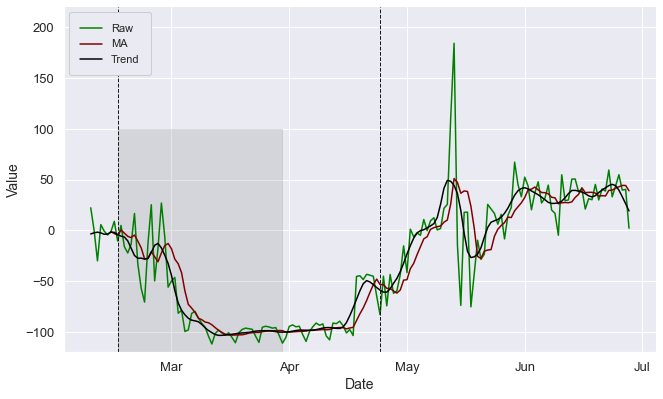

In [38]:
#hide_input
f = sns.relplot(data=long_centered_mean_stl_ma.query("locality_name == 'Lombardia' and category=='parks'").sort_values("variable"), x="date", y="value", hue="variable",
                col="locality_name", col_wrap=2, kind="line", height=6, legend="brief", aspect=1.5, 
                  markers=True, dashes=True, facet_kws={'sharey': True, 'sharex': False}, palette=['green','maroon','black']) #brown, fuchsia

f._legend.remove()
 
plt.subplots_adjust(#left=0.125,
                    bottom=0.1, 
                    #right=0.9, 
                    top=0.9, 
                    #wspace=0.2, 
                    hspace=0.35
                    )

# Iterate thorugh each axis
for ax in f.axes:
    ax.set(xlabel='Date', ylabel='Value') 

    handles, labels = ax.get_legend_handles_labels()
    #if handles:
    set_labels = ["Raw", "MA", "Trend"] 
    ax.legend(
        labels=set_labels, 
        title="", 
        fancybox=True, 
        framealpha=1, 
        #shadow=True, 
        borderpad=1, 
        loc='upper left', 
        fontsize=11, 
        title_fontsize=11, 
        #frameon=False, 
        handleheight = 0.1,
      )

    # Make x and y-axis labels slightly larger
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))

    # Make title more human-readable and larger
    if ax.get_title():
        ax.set_title("")

    # Make right ylabel more human-readable and larger 
    if ax.texts:
        # This contains the right ylabel text
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],
                transform=ax.transAxes,
                va='center',
                fontsize='xx-large')
        # Remove the original text
        ax.texts[0].remove()

    ax.fill_between(long_centered_mean_stl_ma.query("locality_name == 'Lombardia' and category=='parks' and 50 > n_days_since_restriction >= 0")["date"], -150, 100, color="gray", alpha=0.2)

        

restriction_date = datetime.strptime('2020-02-23', '%Y-%m-%d') 
ease_restriction_date = datetime.strptime("2020-05-11", '%Y-%m-%d')

plt.axvline(restriction_date, color='k', linestyle='dashed', linewidth=1)
plt.axvline(ease_restriction_date, color='k', linestyle='dashed', linewidth=1)

plt.tick_params(axis='both',labelsize=13)

axes = plt.gca() 
axes.set_ylim([-120, 220])

In [ ]:
#hide_input
f.savefig(f'{locations_type}_long_centered_mean_stl_ma.png', format='png', dpi=600)

## Computing metrics


- rank não se importa com o valor da redução, ele se importa com a frequência da redução. "quem foi mais vezes bem sucedido" e não "por quanto foi bem sucedido"
- duas medidas parametricas e uma não (rank)

In [41]:
#hide_input
index_cols = ["n_days_since_restriction", "locality_name", "category"]
long_small_period_timedelta = long_small_period.copy()
long_small_period_timedelta["n_days_since_restriction"] = pd.to_timedelta(long_small_period["n_days_since_restriction"], unit='D')

### For a single window

In [42]:
long_small_period_timedelta_grouped50 = long_small_period_timedelta.groupby(pd.Grouper(key='n_days_since_restriction', freq='50D'))

In [43]:
long_small_period

locality_name  n_days_since_restriction          category         raw  \
246      Lombardia                         0            retail   93.057692   
247      Lombardia                         0  grocery_pharmacy  122.615385   
248      Lombardia                         0             parks  101.307692   
249      Lombardia                         0  transit_stations   96.413462   
250      Lombardia                         0        workplaces  109.163462   
...            ...                       ...               ...         ...   
2389     São Paulo                        49  grocery_pharmacy   99.872640   
2390     São Paulo                        49             parks   77.980310   
2391     São Paulo                        49  transit_stations   65.747592   
2392     São Paulo                        49        workplaces   83.163505   
2393     São Paulo                        49       residential  126.232208   

           trend     rollavg  
246   100.250729  108.640110  
247   116.646951  113.780220  
248   107.660260  107.153846  
249    91.984478  108.237637  
250   101.372983  111.581044  
...          ...         ...  
2389  101.528430   97.473127  
2390   77.716395   78.363070  
2391   64.332738   63.498957  
2392   78.254019   75.416396  
2393  127.063203  127.401679  

[1500 rows x 6 columns]

In [44]:
results_complete, long_results_complete = computing_metrics(long_small_period_timedelta_grouped50)
long_results_complete

n_days_since_restriction          category  locality_name   agg   metric  \
0                     0 days  grocery_pharmacy       Amazonas  mean      raw   
1                     0 days  grocery_pharmacy      Lombardia  mean      raw   
2                     0 days  grocery_pharmacy       New York  mean      raw   
3                     0 days  grocery_pharmacy      São Paulo  mean      raw   
4                     0 days  grocery_pharmacy  Île-de-France  mean      raw   
..                       ...               ...            ...   ...      ...   
265                   0 days        workplaces       Amazonas   auc  rollavg   
266                   0 days        workplaces      Lombardia   auc  rollavg   
267                   0 days        workplaces       New York   auc  rollavg   
268                   0 days        workplaces      São Paulo   auc  rollavg   
269                   0 days        workplaces  Île-de-France   auc  rollavg   

           value  
0      91.350923  
1      77.512308  
2      97.747342  
3      94.664313  
4      79.018376  
..           ...  
265  3884.429474  
266  3215.410714  
267  3563.066347  
268  3778.722632  
269  2530.217643  

[270 rows x 6 columns]

In [45]:
fig = px.line_polar(long_results_complete.query("agg=='auc'"), 
                    r="value", theta="category", color="locality_name", animation_frame="metric",
                    labels=plotly_labels, line_close=True)

fig.layout.polar.radialaxis.range = [min(long_results_complete.query("agg=='auc'")["value"]), max(long_results_complete.query("agg=='auc'")["value"])]
fig.show()

#### Inspecting categories

In [46]:
long_results_workplaces = long_results_complete.query("category == 'workplaces'").drop("category", axis=1)
data_results_workplaces = long_results_workplaces.pivot_table(index="locality_name", columns=["agg", "metric"], values="value")

data_results_workplaces.rank().sort_values(("auc","raw")).style\
                       .set_precision(0)\
                       .set_properties(**df_style)\
                       .apply(bg_color, cmap='PuBu')

In [47]:
#print(data_results_workplaces.rank().sort_values(("auc","raw")).to_latex(index=False))

**regiões**
- auc e mean tem resultados iguais. rank muda das outras medidas de agregamento somente no raw. 
- NY esta no ultimo em raw e trend (menos quando é no rank/raw), porém no rollavg ele troca com o Amazonas 

In [48]:
long_results_grocery_pharmacy = long_results_complete.query("category == 'grocery_pharmacy'").drop("category", axis=1)
data_results_grocery_pharmacy = long_results_grocery_pharmacy.pivot_table(index="locality_name", 
                                                                          columns=["agg", "metric"], values="value")
data_results_grocery_pharmacy.rank().sort_values(("mean","raw")).style\
                            .set_precision(0)\
                            .set_properties(**df_style)\
                            .apply(bg_color, cmap='PuBu')

In [49]:
data_results_grocery_pharmacy.head()

agg                    auc                                 mean             \
metric                 raw      rollavg        trend        raw    rollavg   
locality_name                                                                
Amazonas       4455.565897  4504.655183  4471.890885  91.350923  92.184352   
Lombardia      3805.346154  3959.912088  3785.812097  77.512308  80.963077   
New York       4768.812635  4850.637476  4767.917534  97.747342  99.261617   
São Paulo      4626.737175  4680.498404  4635.640873  94.664313  95.720506   
Île-de-France  3842.878205  3937.124237  3819.646735  79.018376  80.704090   

agg                        rank                 
metric             trend    raw rollavg  trend  
locality_name                                   
Amazonas       91.587983  162.0   140.0  148.0  
Lombardia      77.436614  114.0   118.0  111.0  
New York       97.704661  195.0   214.0  213.0  
São Paulo      94.872682  180.0   176.0  181.0  
Île-de-France  78.376272   99.0   102.0   97.0

In [50]:
long_results_parks = long_results_complete.query("category == 'parks'").drop("category", axis=1)
data_results_parks = long_results_parks.pivot_table(index="locality_name", 
                                                    columns=["agg", "metric"], values="value")
data_results_parks.rank().sort_values(("mean","raw")).style\
                       .set_precision(0)\
                       .set_properties(**df_style)\
                       .apply(bg_color, cmap='PuBu')

### For multiple windows

In [51]:
long_small_period_timedelta_grouped_10D = long_small_period_timedelta.groupby(pd.Grouper(key='n_days_since_restriction', freq='10D'))
results_complete_10D, long_results_complete_10D = computing_metrics(long_small_period_timedelta_grouped_10D)

#### Inspecting categories

In [52]:
long_results_workplaces_10D = long_results_complete_10D.query("category == 'workplaces'").drop("category", axis=1)
long_results_workplaces_10D["n_days_since_restriction"] = long_results_workplaces_10D["n_days_since_restriction"].dt.days
px.line(
        data_frame=long_results_workplaces_10D,
        x="n_days_since_restriction",
        y="value",
        color="locality_name",
        facet_col="metric",
        animation_frame="agg",
        )

In [53]:
long_results_complete_10D

n_days_since_restriction          category  locality_name   agg   metric  \
0                      0 days  grocery_pharmacy       Amazonas  mean      raw   
1                      0 days  grocery_pharmacy      Lombardia  mean      raw   
2                      0 days  grocery_pharmacy       New York  mean      raw   
3                      0 days  grocery_pharmacy      São Paulo  mean      raw   
4                      0 days  grocery_pharmacy  Île-de-France  mean      raw   
...                       ...               ...            ...   ...      ...   
1345                  40 days        workplaces       Amazonas   auc  rollavg   
1346                  40 days        workplaces      Lombardia   auc  rollavg   
1347                  40 days        workplaces       New York   auc  rollavg   
1348                  40 days        workplaces      São Paulo   auc  rollavg   
1349                  40 days        workplaces  Île-de-France   auc  rollavg   

           value  
0      98.281923  
1     109.061538  
2     112.354519  
3      98.898764  
4     103.829487  
...          ...  
1345  654.152935  
1346  388.432692  
1347  622.775376  
1348  688.667587  
1349  410.529609  

[1350 rows x 6 columns]

In [54]:
  long_results_workplaces_10D.query("agg=='rank'")

n_days_since_restriction  locality_name   agg   metric  value
475                         0       Amazonas  rank      raw   40.0
476                         0      Lombardia  rank      raw   33.0
477                         0       New York  rank      raw   24.0
478                         0      São Paulo  rank      raw   30.0
479                         0  Île-de-France  rank      raw   23.0
..                        ...            ...   ...      ...    ...
895                        40       Amazonas  rank  rollavg   40.0
896                        40      Lombardia  rank  rollavg   10.0
897                        40       New York  rank  rollavg   30.0
898                        40      São Paulo  rank  rollavg   50.0
899                        40  Île-de-France  rank  rollavg   20.0

[75 rows x 5 columns]

**paises**
- em todas as situações a Espanha é melhor que a Corea do Sul salvo em casos pontuais, analisando na janela de 10D usando rank conseguimos ver que a Corea do Sul fica melhor que a espanha (combinação entre preprocessamento, metrica e granularidade temporal)

- notar que quando trabalhamos com janela 50D perdemos a noção do comportamento no tempo
    - Espanha: começa mal, tem queda e consegue se manter. 
    - Nova Zelandia: começa bem e piora. 
- observar espanha e alemanha (na janela que inicia em 0): 
  - ruido no dado original é observavel
  - no trend o ruido é amenizado (as duas começam em ponto proximo) 
  - e no rollavg o efeito do ruido é potencializado (a diferença é maior que no raw)

**regiões**
- notar que quando trabalhamos com janela 50D perdemos a noção do comportamento no tempo
    - Lombardia começa mal, tem queda e termina bem 
    - NY começa "bem", e piora

In [55]:
long_results_grocery_10D = long_results_complete_10D.query("category == 'grocery_pharmacy'").drop("category", axis=1)
long_results_grocery_10D["n_days_since_restriction"] = long_results_grocery_10D["n_days_since_restriction"].dt.days
px.line(
        data_frame=long_results_grocery_10D,
        x="n_days_since_restriction",
        y="value",
        color="locality_name",
        facet_col="metric",
        animation_frame="agg",
        )

- para grocery pharmy o efeito tbm é observado: na janela zero paises como espanha e canada se tornam os piores segundo o rollavg.

In [56]:
long_results_parks_10D = long_results_complete_10D.query("category == 'parks'").drop("category", axis=1)
long_results_parks_10D["n_days_since_restriction"] = long_results_parks_10D["n_days_since_restriction"].dt.days
px.line(
        data_frame=long_results_parks_10D,
        x="n_days_since_restriction",
        y="value",
        color="locality_name",
        facet_col="metric",
        animation_frame="agg",
        )

- para parks temos um grupo bem claro a partir da janela 10D (argentina, nova zelandia e espanha).
- o segundo grupo de paises é afetado por todos os fatores considerados.